In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualisation
import seaborn as sns 

In [2]:
#import dataset into notebook
df = pd.read_csv('Instagram-Reach.csv')
df.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


In [3]:
#import plotly - visualisation
import plotly.graph_objs as go
import plotly.express as px 
import plotly.io as pio 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Instagram reach
0,2022-04-01,7620
1,2022-04-02,12859
2,2022-04-03,16008
3,2022-04-04,24349
4,2022-04-05,20532


### Exploratory visualisation

In [5]:
fig = px.line(df,x='Date',y='Instagram reach')
fig.show()

In [7]:
#analysis of the reach using bar chart to visualising trends for each day

fig2 = px.bar(df,x='Date',y='Instagram reach') 
fig2.show()

In [8]:
#summary statistics of the reach 
df.describe()

,Instagram reach
count,365.000000
mean,50474.712329
std,30051.787552
min,7620.000000
25%,25070.000000
50%,43987.000000
75%,68331.000000
max,161998.000000


In [9]:
fig4 = px.histogram(df,x='Instagram reach')
fig4.show()

In [10]:
#adding days to the column 
df['Day_name'] = df['Date'].dt.day_name()
df.head()

,Date,Instagram reach,Day_name
0,2022-04-01,7620,Friday
1,2022-04-02,12859,Saturday
2,2022-04-03,16008,Sunday
3,2022-04-04,24349,Monday
4,2022-04-05,20532,Tuesday


In [13]:
#reach based on day of week 
fig5 = go.Figure()
fig5.add_trace(go.Box(x=df['Day_name'],
    y=df['Instagram reach'], 
                     name='Instagram reach'))

fig5.show()

## Reach forecasting using Classical Time-series forecasting techniques


### Sequential ARIMA

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [18]:
from plotly.tools import mpl_to_plotly

data = df[['Date','Instagram reach']]
result = seasonal_decompose(data['Instagram reach'], 
                            model='multiplicative', 
                            period=100)

fig = plt.figure()
fig = result.plot()

fig = mpl_to_plotly(fig)
fig.show()

<Figure size 432x288 with 0 Axes>

The multiplicative model considers the time series to be a product of the trend, seasonal and irregular components (Australia Bureau of statistics). The use of a seasonal model in such a problem is when the time series is evidently dominated by a trend or irregular components. 

The multiplicative model : Observed series = Trend x Seasonal x Irregular . 
The trend and the original series have same units in the plot above, whilst seasonal and residuals (or) irregular are unitless. 


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

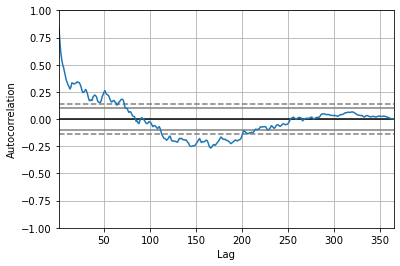

In [20]:
#to find p,d and q values 
pd.plotting.autocorrelation_plot(data['Instagram reach'])

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



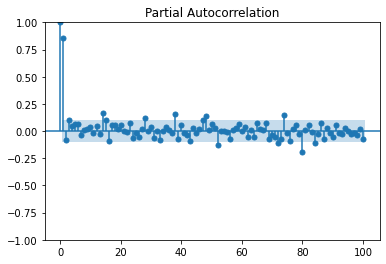

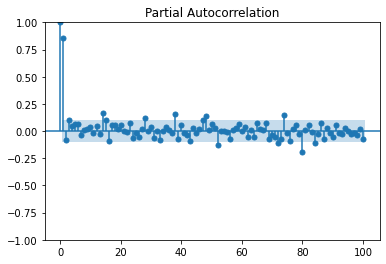

In [21]:
#p = 8
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Instagram reach"], lags = 100)

In [ ]:
#q=2
p,d,q = 8,1,2

In [23]:
from statsmodels.tsa.arima.model import ARIMA


In [27]:
endog = data['Instagram reach']
model = ARIMA(endog, order=(9, 1, 2))


In [28]:
result_arima = model.fit()


In [29]:
print(result_arima.summary())

                               SARIMAX Results                                
Dep. Variable:        Instagram reach   No. Observations:                  365
Model:                 ARIMA(9, 1, 2)   Log Likelihood               -4020.426
Date:                Fri, 12 Jan 2024   AIC                           8064.851
Time:                        20:29:08   BIC                           8111.617
Sample:                             0   HQIC                          8083.438
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1025      0.440      0.233      0.816      -0.760       0.966
ar.L2          0.4931      0.398      1.240      0.215      -0.286       1.273
ar.L3         -0.0902      0.102     -0.881      0.3

In [31]:
yhat = result_arima.predict(len(data), len(data)+100, typ='levels')
print(yhat)

365    19563.317097
366    22417.601433
367    23964.015953
368    26767.827163
369    29184.804700
           ...     
461    27871.341778
462    27871.341350
463    27871.341718
464    27871.341401
465    27871.341674
Name: predicted_mean, Length: 101, dtype: float64


In [35]:
trace_train = go.Scatter(x=data.index, 
                         y=data["Instagram reach"], 
                         mode="lines", 
                         name="Training Data")
trace_pred = go.Scatter(x=yhat.index, 
                        y=yhat, 
                        mode="lines", 
                        name="Predictions")

layout = go.Layout(title="Instagram Reach Time Series and Predictions", 
                   xaxis_title="Date", 
                   yaxis_title="Instagram Reach")

fig = go.Figure(data=[trace_train, trace_pred], layout=layout)
fig.show()

ARIMA (AutoRegressive Integrated Moving Average):
Components:
- AutoRegressive (AR): Captures the relationship between an observation and some number of lagged observations.
- Integrated (I): Represents the differencing of raw observations to make the time series stationary.
- Moving Average (MA): Models the relationship between an observation and a residual error from a moving average model applied to lagged observations.
Parameters: ARIMA models have parameters denoted as (p, d, q), where:
- p: Order of the AutoRegressive component. (here p = 8)
- d: Degree of differencing. (d=1)
- q: Order of the Moving Average component. (q=2)
Seasonality: ARIMA models do not explicitly handle seasonality in the data.

In [33]:
import statsmodels.api as sm
import warnings
model_s=sm.tsa.statespace.SARIMAX(data['Instagram reach'],
                                order=(8, 1, 2),
                                seasonal_order=(8, 1, 2, 12)) #s=12
model_s=model_s.fit()
print(model_s.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08062D+01    |proj g|=  4.51058D-02


 This problem is unconstrained.



At iterate    5    f=  1.07996D+01    |proj g|=  1.64739D-03

At iterate   10    f=  1.07979D+01    |proj g|=  2.14129D-02

At iterate   15    f=  1.07917D+01    |proj g|=  4.15623D-03

At iterate   20    f=  1.07914D+01    |proj g|=  7.37905D-04

At iterate   25    f=  1.07909D+01    |proj g|=  6.74694D-03

At iterate   30    f=  1.07907D+01    |proj g|=  5.05730D-03

At iterate   35    f=  1.07906D+01    |proj g|=  1.53633D-03

At iterate   40    f=  1.07905D+01    |proj g|=  9.88337D-03

At iterate   45    f=  1.07905D+01    |proj g|=  7.01088D-04

At iterate   50    f=  1.07904D+01    |proj g|=  1.36445D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(8, 1, 2)x(8, 1, 2, 12)   Log Likelihood               -3938.512
Date:                            Fri, 12 Jan 2024   AIC                           7919.023
Time:                                    20:37:35   BIC                           8000.159
Sample:                                         0   HQIC                          7951.311
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1880      6.327      0.030      0.976     -12.212      12.588
ar.L2          0.4786      5.890   

In [40]:
y_s= model_s.predict(len(data), len(data)+100)

trace_train2 = go.Scatter(x=data.index, 
                         y=data["Instagram reach"], 
                         mode="lines", 
                         name="Training Data")
trace_pred2 = go.Scatter(x=y_s.index, 
                        y=y_s, 
                        mode="lines", 
                        name="Predictions")

layout2 = go.Layout(title="Instagram Reach Time Series and Predictions", 
                   xaxis_title="Days", 
                   yaxis_title="Instagram Reach")

fig2 = go.Figure(data=[trace_train2, trace_pred2], layout=layout2)
fig2.show()

In summary, while ARIMA focuses on capturing overall trends and patterns in time series data, SARIMA extends this capability by specifically addressing and modeling seasonality in the data. 